<a href="https://colab.research.google.com/github/grzegorzkwolek/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/GKwolek_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np

In [0]:
columns = ["political_view",
           "handicapped_infants",
           "water_project_cost_sharing",
           "adoption_of_the_budget_resolution",
           "physician_fee_freeze",
           "el_salvador_aid",
           "religious_groups_in_schools",
           "anti_satellite_test_ban",
           "aid_to_nicaraguan_contras",
           "mx_missile",
           "immigration",
           "synfuels_corporation_cutback",
           "education_spending",
           "superfund_right_to_sue",
           "crime",
           "duty_free_exports",
           "export_administration_act_south_africa"]

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", na_values = "?", names = columns)
df.head()

,political_view,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df = df.replace(to_replace=['n', 'y'], value=[0, 1])
df = df.fillna(0.5)

In [0]:
df_rep = df[df["political_view"] == "republican"]
df_rep = df_rep.drop("political_view", axis=1)

In [0]:
df_dem = df[df["political_view"] == "democrat"]
df_dem = df_dem.drop("political_view", axis = 1)

In [7]:
df_dem.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
2,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0


In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean - interval, mean, mean + interval)

In [0]:
columns = ["handicapped_infants",
           "water_project_cost_sharing",
           "adoption_of_the_budget_resolution",
           "physician_fee_freeze",
           "el_salvador_aid",
           "religious_groups_in_schools",
           "anti_satellite_test_ban",
           "aid_to_nicaraguan_contras",
           "mx_missile",
           "immigration",
           "synfuels_corporation_cutback",
           "education_spending",
           "superfund_right_to_sue",
           "crime",
           "duty_free_exports",
           "export_administration_act_south_africa"]

In [10]:
confidence_interval(df_dem["handicapped_infants"])

(0.5430578842906294, 0.601123595505618, 0.6591893067206066)

In [11]:
df_dem.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
2,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0


In [0]:
dem_test = []
for col in columns:
  new_entry_tuple = confidence_interval(df_dem[col])
  dem_test.append(new_entry_tuple)

In [0]:
rep_test = []
for col in columns:
  new_entry_tuple = confidence_interval(df_rep[col])
  rep_test.append(new_entry_tuple)

In [0]:
dem_test = pd.DataFrame(data=dem_test, index = columns, columns = ['mean_less_interval', 'mean', 'mean_W_interval'])
rep_test = pd.DataFrame(data=rep_test, index = columns, columns = ['mean_less_interval', 'mean', 'mean_W_interval'])

In [0]:
import matplotlib.pyplot as plt

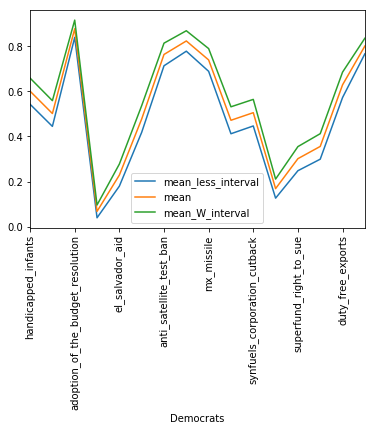

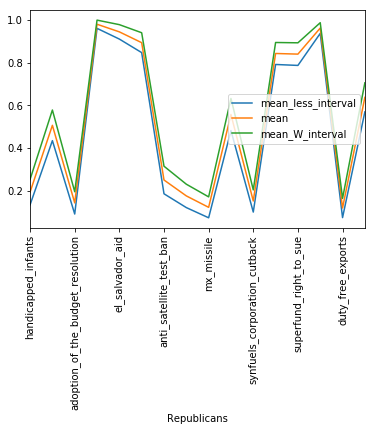

In [16]:
dem_test.plot()
plt.xticks(rotation = 90)
plt.xlabel("Democrats");
rep_test.plot()
plt.xticks(rotation = 90)
plt.xlabel("Republicans");

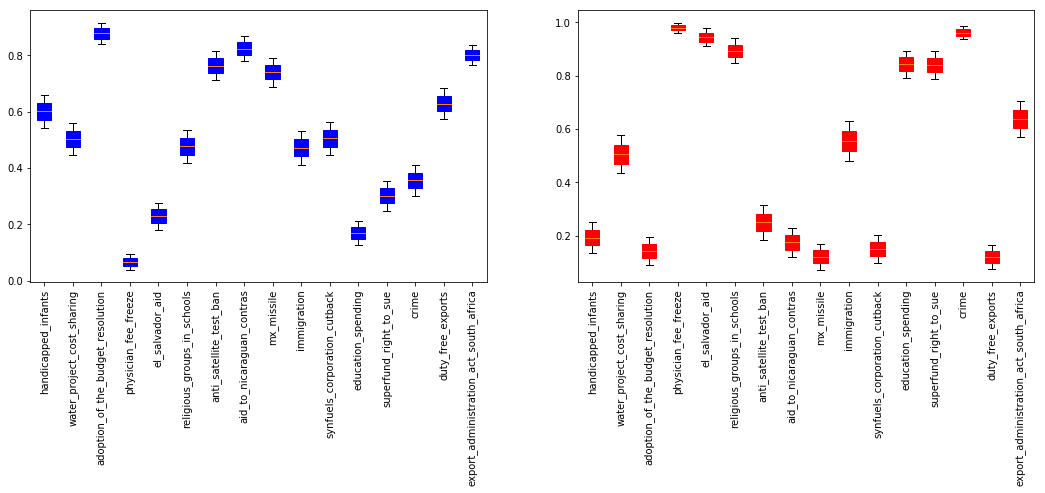

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
ax1 = axes[0].boxplot(dem_test,
                      patch_artist=True)
plt.setp(ax1['boxes'], color='blue')
# this is how to set a different color to a set of boxes in boxplot!

axes[0].set_xticklabels(columns, rotation = 90)

ax2 = axes[1].boxplot(rep_test,
                      patch_artist=True)  
plt.setp(ax2['boxes'], color='red');
axes[1].set_xticklabels(columns, rotation = 90);

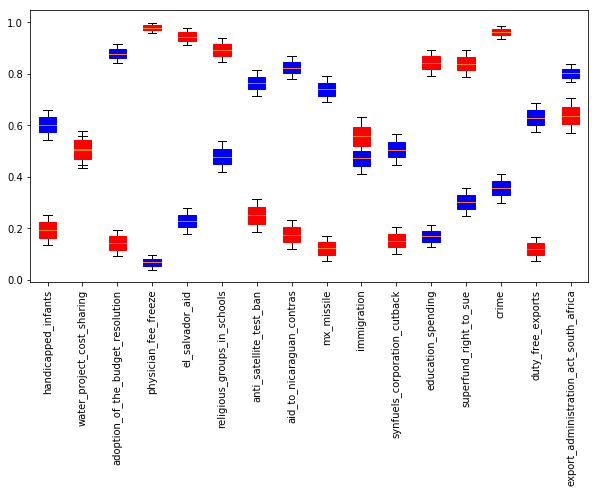

In [18]:
fig, axes = plt.subplots(figsize=(10, 5))

ax1 = axes.boxplot(dem_test,
                      patch_artist=True)
plt.setp(ax1['boxes'], color='blue')

ax2 = axes.boxplot(rep_test,
                      patch_artist=True)  
plt.setp(ax2['boxes'], color='red')

axes.set_xticklabels(columns, rotation = 90);

In [0]:
dem_test = dem_test.T

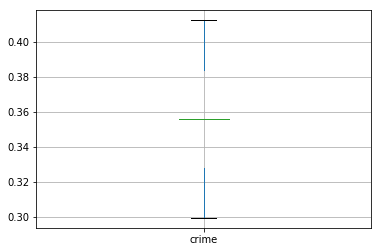

In [20]:
single_test = pd.DataFrame(dem_test['crime'])
single_test.boxplot(showbox=False);

In [21]:
single_test

,crime
mean_less_interval,0.299201
mean,0.355805
mean_W_interval,0.412409


### The whiskers (and not the box) signify the range within which we should expect the Democrats to support "crime" vote.
In other words, we can assume that 95 in every 100 of democrats would vote in support of "crime" 29.9% to 41.2% of times.


### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


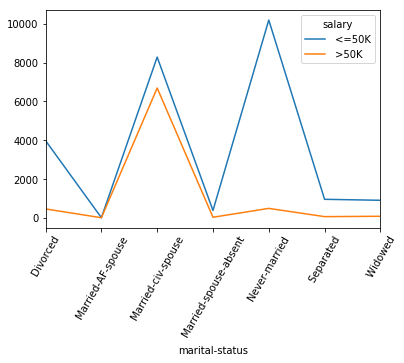

In [23]:
df = df.sort_values(by='marital-status')
cont_table = pd.crosstab(df['marital-status'], df['salary']) 
cont_table.plot()
plt.xticks(rotation = 60);

In [0]:
cont_table = pd.crosstab(df['marital-status'], df['salary'], margins = True) 

In [0]:
row_sums = cont_table.iloc[0:7, 2].values
col_sums = cont_table.iloc[7, 0:2].values

In [26]:
total = cont_table.loc['All','All']
total

32561

In [27]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected)

[[3.37308314e+03 1.06991686e+03]
 [1.74613802e+01 5.53861982e+00]
 [1.13696361e+04 3.60636393e+03]
 [3.17341605e+02 1.00658395e+02]
 [8.11043150e+03 2.57256850e+03]
 [7.78170204e+02 2.46829796e+02]
 [7.53876109e+02 2.39123891e+02]]


In [28]:
observed = pd.crosstab(df['marital-status'], df['salary']).values
observed

array([[ 3980,   463],
       [   13,    10],
       [ 8284,  6692],
       [  384,    34],
       [10192,   491],
       [  959,    66],
       [  908,    85]])

In [29]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

6517.741653663022

In [30]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

6517.741653663022 0.0 6 [[3.37308314e+03 1.06991686e+03]
 [1.74613802e+01 5.53861982e+00]
 [1.13696361e+04 3.60636393e+03]
 [3.17341605e+02 1.00658395e+02]
 [8.11043150e+03 2.57256850e+03]
 [7.78170204e+02 2.46829796e+02]
 [7.53876109e+02 2.39123891e+02]]


### Null hypothesis - within different salary levels there is similar distribution of the people with different marital status.
The chi square test results suggest to reject this hypothesis. If to further research the data, based on this finding, one could dive deeper to understand the difference within the "divorced" and "never married" groups. For "never married" the culprit could be the age.

In [31]:
df['marital-status'].unique()

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

In [32]:
test_table = df[df['marital-status'] == " Divorced"]
test_table.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
24425,47,Private,275095,Some-college,10,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
18919,46,State-gov,314770,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,48,United-States,<=50K
18920,45,Private,135044,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
24687,36,Private,187098,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
24685,44,Private,77313,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,38,United-States,<=50K


In [0]:
age_bin = pd.cut(df['age'], 15)

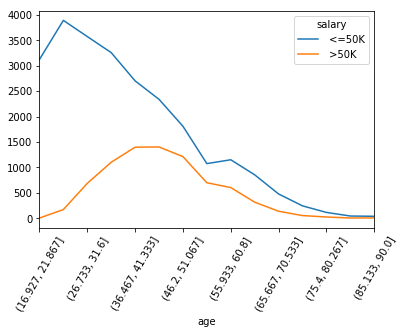

In [34]:
test_observation = pd.crosstab(age_bin, df['salary'])
test_observation.plot()
plt.xticks(rotation = 60);


### The above represents the "Never-married" group; it suggests the correlation in salary ranges for the different martil status is spuriously correlated with the "never married" status. There seems to be a strong correlation between the salary levels and age within this subcategory.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)